In [1]:
# import
import graphlab as gl
import matplotlib.pyplot as plt
import math
import random
import numpy as np

In [2]:
gl.canvas.set_target('ipynb')
%matplotlib inline

creating 30 observation between 0,1

In [3]:
random.seed(98103)
n=30
x = gl.SArray([random.random() for i in range(30)]).sort()

This non-commercial license of GraphLab Create for academic use is assigned to atul9806@yahoo.in and will expire on February 02, 2018.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\Atul\AppData\Local\Temp\graphlab_server_1503201974.log.0


Computing y = sin(4x)

In [4]:
y = x.apply(lambda v: math.sin(4*v))

Add random Gaussian noise to y

In [5]:
random.seed(1)
e= gl.SArray([random.gauss(0, 1.0/3.0) for i in range(n)])
y = y+e

In [6]:
data = gl.SFrame({'X1': x, 'Y':y})
data

X1,Y
0.0395789449501,0.587050191026
0.0415680996791,0.648655851372
0.0724319480801,0.307803309485
0.150289044622,0.310748447417
0.161334144502,0.237409625496
0.191956312795,0.705017157224
0.232833917145,0.461716676992
0.259900980166,0.383260507851
0.380145814869,1.06517691429
0.432444723508,1.03184706949


In [7]:
def plot_data(data):
    plt.plot(data['X1'], data['Y'], 'k.')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)

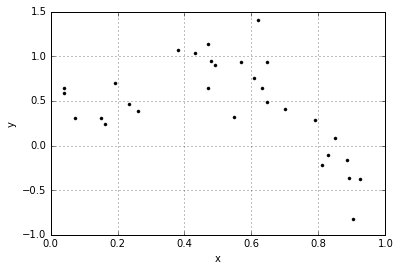

In [8]:
plot_data(data)

In [9]:
def polynomial_features(data, deg):
    data1 = data.copy()
    for i in range(1, deg):
        data1['X'+str(i+1)] = data1['X'+str(i)]*data1['X1']
    return data1

In [10]:
def polynomial_regression(data, deg):
    
    model = gl.linear_regression.create(polynomial_features(data,deg),  target='Y', 
                                        validation_set=None, l2_penalty=0, l1_penalty=0,
                                        verbose=False)
    return model

In [11]:
def plot_poly_predictions(data, model):
    plot_data(data)
    
    #get polynomial degree
    deg = len(model.coefficients['value'])-1
    
    #creating 200 points on x axis and predicting the Y value
    x_pred = gl.SFrame({'X1':[i/200.0 for i in range(200)]})
    y_pred = model.predict(polynomial_features(x_pred, deg))
    
    #plotting
    plt.plot(x_pred['X1'], y_pred, 'g-', label='degree '+str(deg)+' fit')
    plt.legend(loc='upper left')
    plt.axis([0,1,-1.5, 2])

In [12]:
def print_coefficients(model):
    deg = len(model.coefficients['value'])-1
    coeff = list(model.coefficients['value'])
    
    #Numpy has a very nice function to print out the polynomial in a pretty way
    #but we need the coeff in reverse order for that
    print 'Learning polynomial for degree '+str(deg)+':'
    coeff.reverse()
    print np.poly1d(coeff)

### Fitting a deg 2 polynomial

In [13]:
model = polynomial_regression(data, deg=2)

In [14]:
print_coefficients(model)

Learning polynomial for degree 2:
        2
-5.129 x + 4.147 x + 0.07471


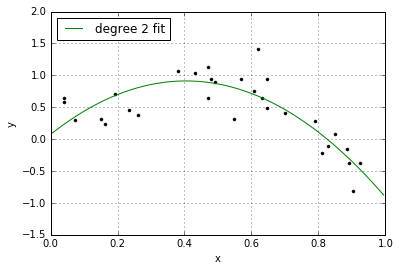

In [15]:
plot_poly_predictions(data, model)

### Fitting a deg 4

Learning polynomial for degree 4:
       4         3         2
23.87 x - 53.82 x + 35.23 x - 6.828 x + 0.7755


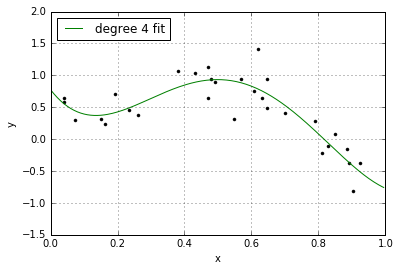

In [16]:
model = polynomial_regression(data, deg=4)
print_coefficients(model)
plot_poly_predictions(data, model)

### Fitting deg 16

Learning polynomial for degree 16:
            16             15             14            13
-4.537e+05 x  + 1.129e+06 x  + 4.821e+05 x  - 3.81e+06 x 
              12             11             10             9
 + 3.536e+06 x  + 5.753e+04 x  - 1.796e+06 x  + 2.178e+06 x
              8             7            6             5             4
 - 3.662e+06 x + 4.442e+06 x - 3.13e+06 x + 1.317e+06 x - 3.356e+05 x
             3        2
 + 5.06e+04 x - 4183 x + 160.8 x - 1.621


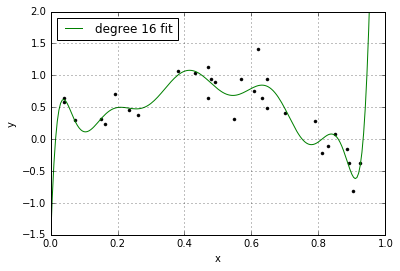

In [17]:
model = polynomial_regression(data, deg=16)
print_coefficients(model)
plot_poly_predictions(data, model)

** Above fit looks pretty wild, here's a clear example of how overfitting is associated with very large magnitute estimated coefficient. **

### Ridge Regression

In [18]:
def polynomial_ridge_regression(data, deg, l2_penalty=0):
    
    model = gl.linear_regression.create(polynomial_features(data,deg),  target='Y', 
                                        validation_set=None, l2_penalty=l2_penalty, l1_penalty=0,
                                        verbose=False)
    return model

** Performace a ridge fit of a deg 16 polynomial using a very small penalty**

In [19]:
model = polynomial_ridge_regression(data, 16, l2_penalty=1e-25)
print_coefficients(model)

Learning polynomial for degree 16:
            16             15             14            13
-4.537e+05 x  + 1.129e+06 x  + 4.821e+05 x  - 3.81e+06 x 
              12             11             10             9
 + 3.536e+06 x  + 5.753e+04 x  - 1.796e+06 x  + 2.178e+06 x
              8             7            6             5             4
 - 3.662e+06 x + 4.442e+06 x - 3.13e+06 x + 1.317e+06 x - 3.356e+05 x
             3        2
 + 5.06e+04 x - 4183 x + 160.8 x - 1.621


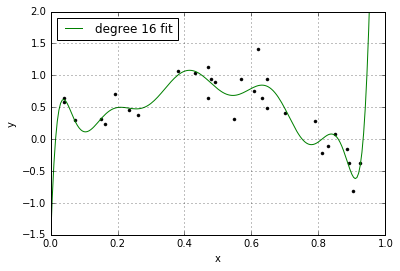

In [20]:
plot_poly_predictions(data, model)

** Performace a ridge fit of a deg 16 polynomial using a very large penalty**

In [21]:
model = polynomial_ridge_regression(data, 16, l2_penalty=100)
print_coefficients(model)

Learning polynomial for degree 16:
        16          15          14          13          12         11
-0.301 x  - 0.2802 x  - 0.2604 x  - 0.2413 x  - 0.2229 x  - 0.205 x 
           10          9          8          7          6           5
 - 0.1874 x  - 0.1699 x - 0.1524 x - 0.1344 x - 0.1156 x - 0.09534 x
            4           3           2
 - 0.07304 x - 0.04842 x - 0.02284 x - 0.002257 x + 0.6416


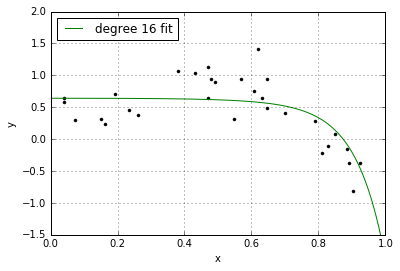

In [22]:
plot_poly_predictions(data, model)

Learning polynomial for degree 16:
            16             15             14            13
-4.537e+05 x  + 1.129e+06 x  + 4.821e+05 x  - 3.81e+06 x 
              12             11             10             9
 + 3.536e+06 x  + 5.753e+04 x  - 1.796e+06 x  + 2.178e+06 x
              8             7            6             5             4
 - 3.662e+06 x + 4.442e+06 x - 3.13e+06 x + 1.317e+06 x - 3.356e+05 x
             3        2
 + 5.06e+04 x - 4183 x + 160.8 x - 1.621


Learning polynomial for degree 16:
           16             15             14             13
4.975e+04 x  - 7.821e+04 x  - 2.265e+04 x  + 3.949e+04 x 
              12        11             10             9             8
 + 4.366e+04 x  + 3074 x  - 3.332e+04 x  - 2.786e+04 x + 1.032e+04 x
              7        6             5             4        3         2
 + 2.962e+04 x - 1440 x - 2.597e+04 x + 1.839e+04 x - 5596 x + 866.1 x - 65.19 x + 2.159


Learning polynomial for degree 16:
       16         15         1

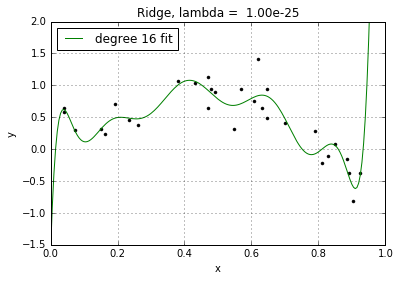

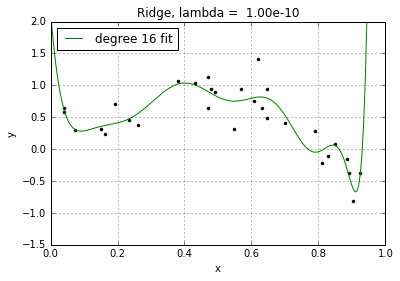

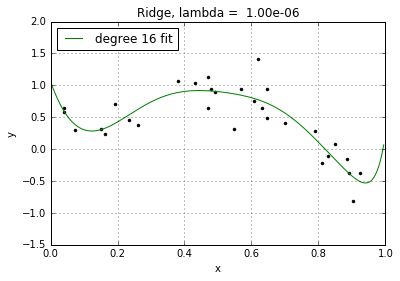

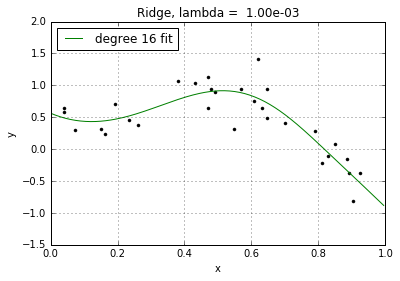

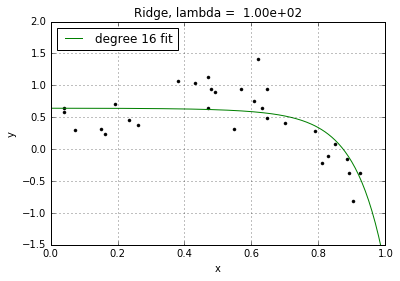

In [23]:
for l2_penalty in [1e-25, 1e-10, 1e-6, 1e-3, 1e2]:
    model = polynomial_ridge_regression(data, 16, l2_penalty=l2_penalty)
    print_coefficients(model)
    print "\n"
    plt.figure()
    plot_poly_predictions(data, model)
    plt.title('Ridge, lambda = % .2e' % l2_penalty)
    

### Perform a ridge fit of a degree polynimial using a "good" penalty strength ###

We use the leave one out (LOO) cross validation to choose the penalty value

In [24]:
def loo(data, deg, penalty_values):
    polynomial_features(data, deg)
    
    num_folds = len(data)
    folds = gl.cross_validation.KFold(data, num_folds)
    
    #for each value of penalty, fit a model for each fold and compute avg MSE
    l2_penalty_mse = []
    min_mse=None
    best_l2_penalty = None
    
    for l2_penalty in penalty_values:
        next_mse=0.0
        for train, validation in folds:
            #train model
            model = gl.linear_regression.create(train, target='Y',
                                               l2_penalty=l2_penalty, 
                                               validation_set=None, verbose=False)
            y_pred = model.predict(validation)
            next_mse = next_mse+ ((y_pred -validation['Y'])**2).sum()
            
        #save sqrd error in list of MSE
        next_mse = next_mse/num_folds  #taking avg of mse
        l2_penalty_mse.append(next_mse)
        #finding out the min and best mse
        
        if min_mse is None or next_mse < min_mse:
            min_mse = next_mse
            best_l2_penalty = l2_penalty
            
    return l2_penalty_mse, best_l2_penalty
        
    
    

Run LOO cross validation for num values of lambda on a log scale

In [25]:
l2_penalty_values = np.logspace(-4, 10, num=10)
l2_penalty_mse, best_l2_penalty = loo(data, 16, l2_penalty_values)

Plot result of estimating LOO for each value lambda

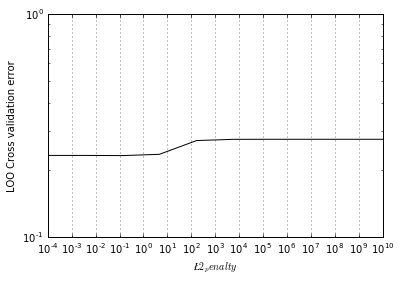

In [26]:
plt.plot(l2_penalty_values, l2_penalty_mse, 'k-')
plt.xlabel('$\L2_penalty$')
plt.ylabel('LOO Cross validation error')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)

Finding the best L2 penalty

In [27]:
best_l2_penalty

0.12915496650148839

In [28]:
model = polynomial_ridge_regression(data, deg=16, l2_penalty=best_l2_penalty)
print_coefficients(model)

Learning polynomial for degree 16:
       16         15          14          13          12           11
1.345 x  + 1.141 x  + 0.9069 x  + 0.6447 x  + 0.3569 x  + 0.04947 x 
           10          9          8         7         6         5
 - 0.2683 x  - 0.5821 x - 0.8701 x - 1.099 x - 1.216 x - 1.145 x
           4           3          2
 - 0.7837 x - 0.07406 x + 0.7614 x + 0.7703 x + 0.3918


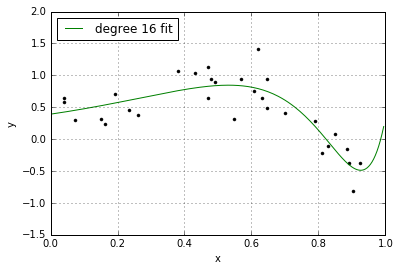

In [29]:
plot_poly_predictions(data, model)